In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("/kaggle/input/massive-yahoo-finance-dataset/stock_details_5_years.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA


In [4]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,602962.000000,602962.000000,602962.000000,602962.000000,6.029620e+05,602962.00000,602962.000000
mean,140.074711,141.853492,138.276316,140.095204,5.895601e+06,0.00731,0.000344
std,275.401725,279.003191,271.895276,275.477969,1.381596e+07,0.12057,0.050607
min,1.052425,1.061195,1.026114,1.034884,0.000000e+00,0.00000,0.000000
25%,39.566159,40.056222,39.058151,39.563746,1.031500e+06,0.00000,0.000000
50%,79.177964,80.125563,78.193820,79.177906,2.228700e+06,0.00000,0.000000
75%,157.837190,159.746317,155.841609,157.847153,5.277400e+06,0.00000,0.000000
max,6490.259766,6525.000000,6405.000000,6509.350098,1.123003e+09,35.00000,20.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          602962 non-null  object 
 1   Open          602962 non-null  float64
 2   High          602962 non-null  float64
 3   Low           602962 non-null  float64
 4   Close         602962 non-null  float64
 5   Volume        602962 non-null  int64  
 6   Dividends     602962 non-null  float64
 7   Stock Splits  602962 non-null  float64
 8   Company       602962 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 41.4+ MB


# Visualization

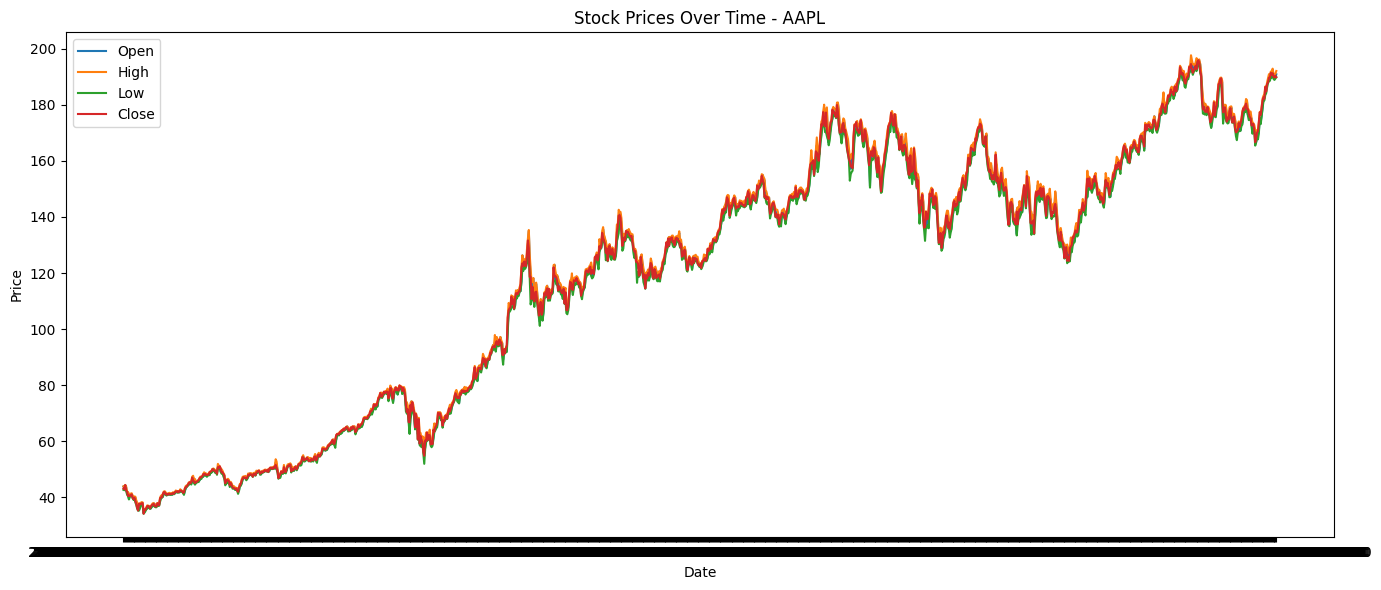

In [6]:
def plot_multiple_features(df, company, features=['Open', 'High', 'Low', 'Close']):
  
    company_df = df[df['Company'] == company]
    
    plt.figure(figsize=(14, 6))
    for feature in features:
        plt.plot(company_df['Date'], company_df[feature], label=feature)

    plt.title(f"Stock Prices Over Time - {company}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.tight_layout()
    plt.show()
    

plot_multiple_features(df, company='AAPL')


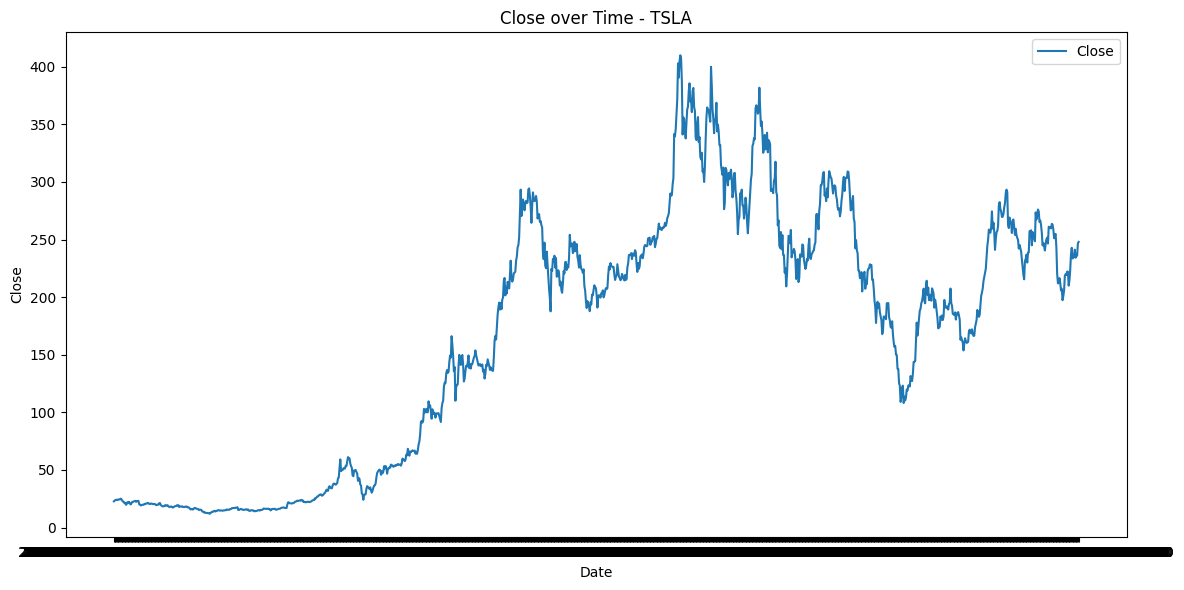

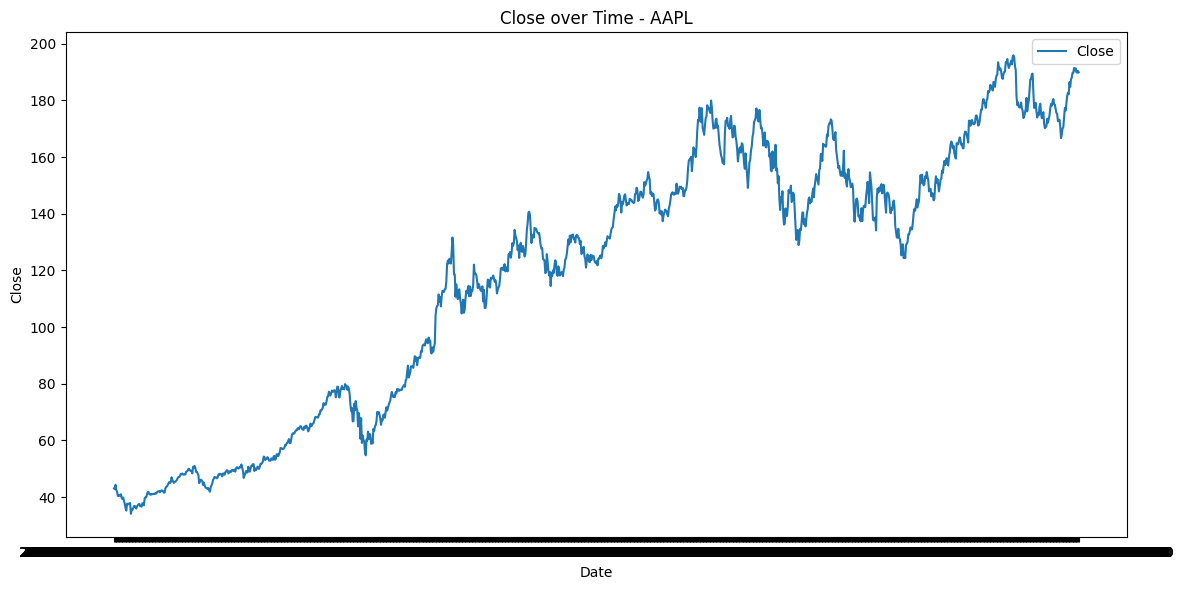

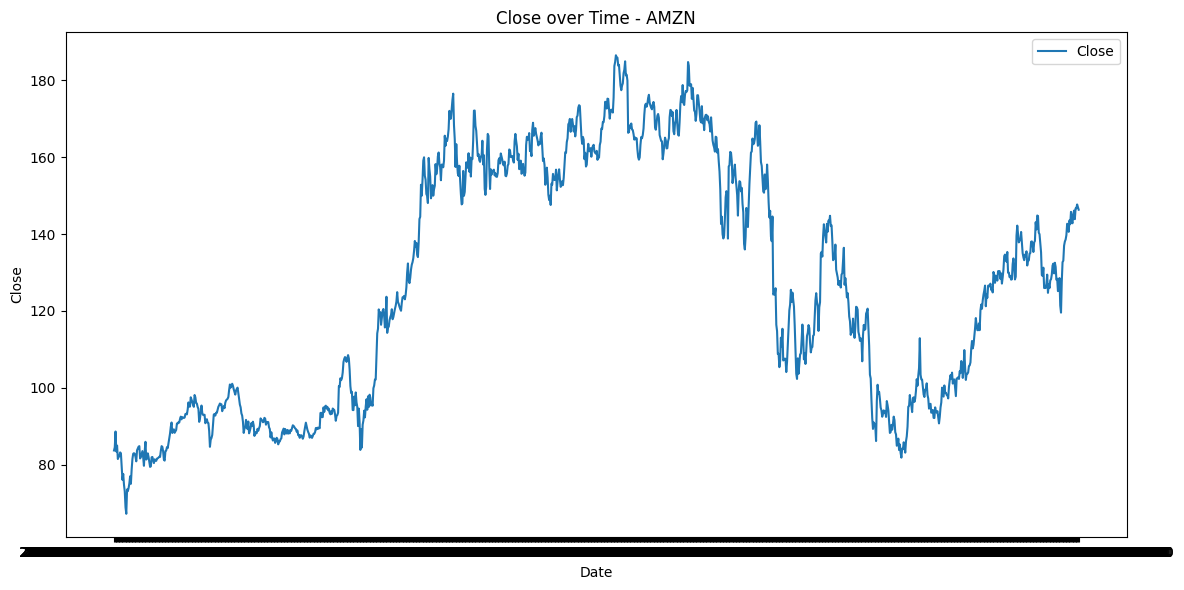

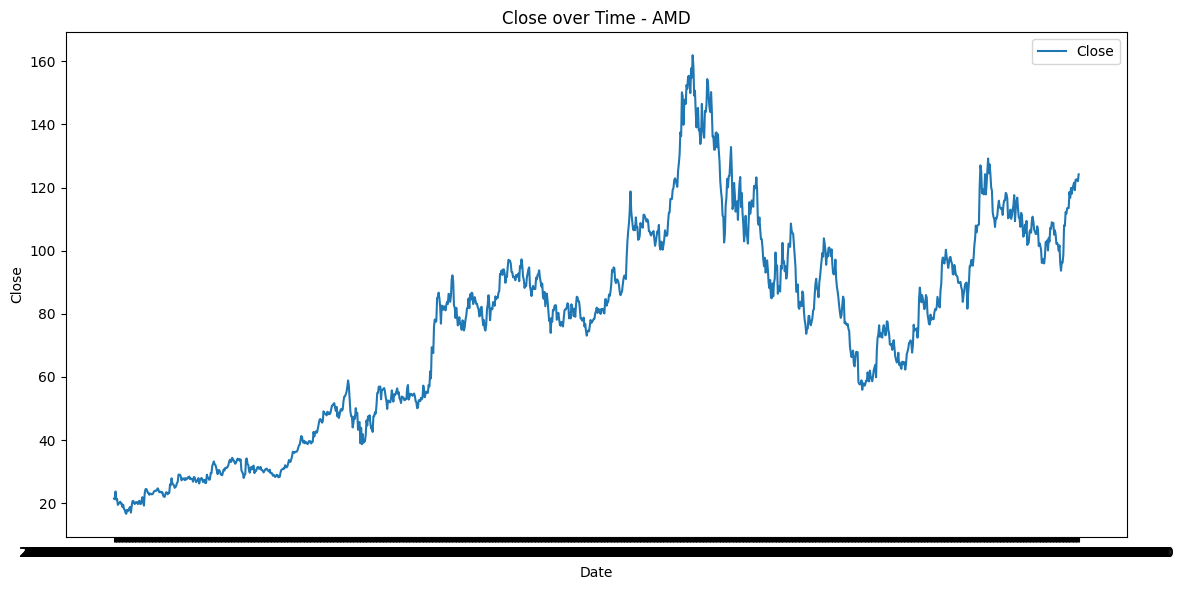

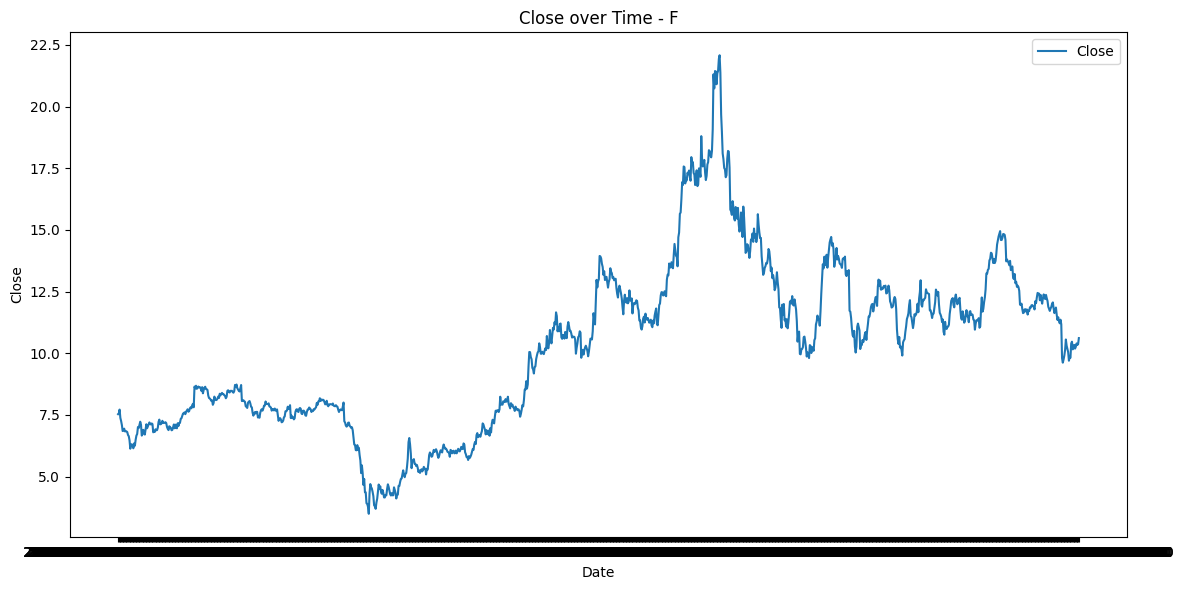

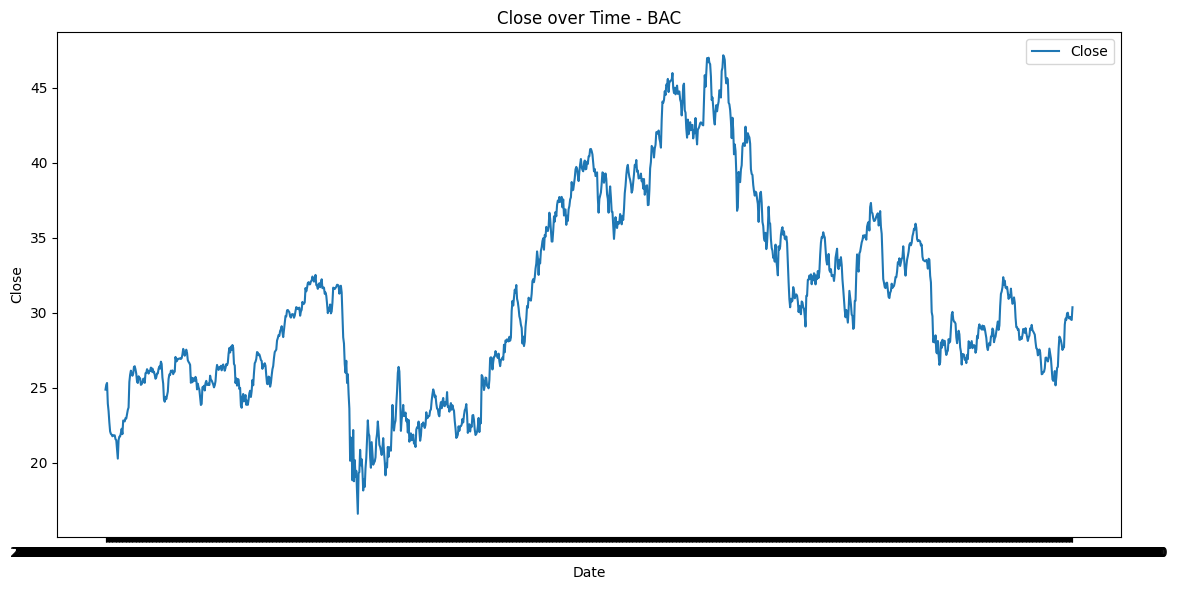

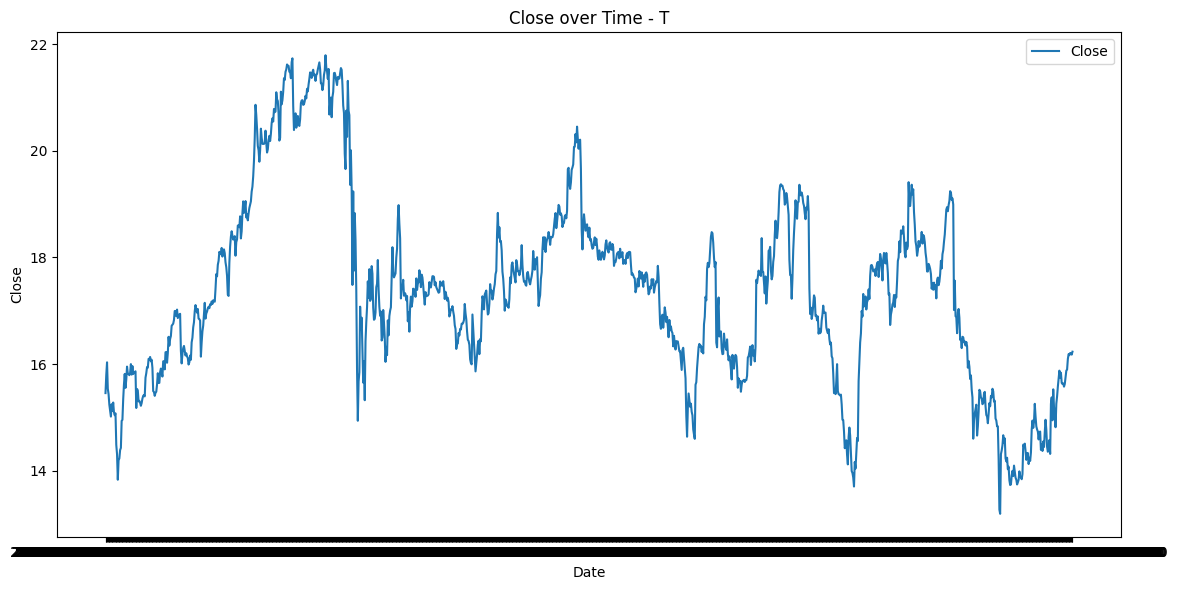

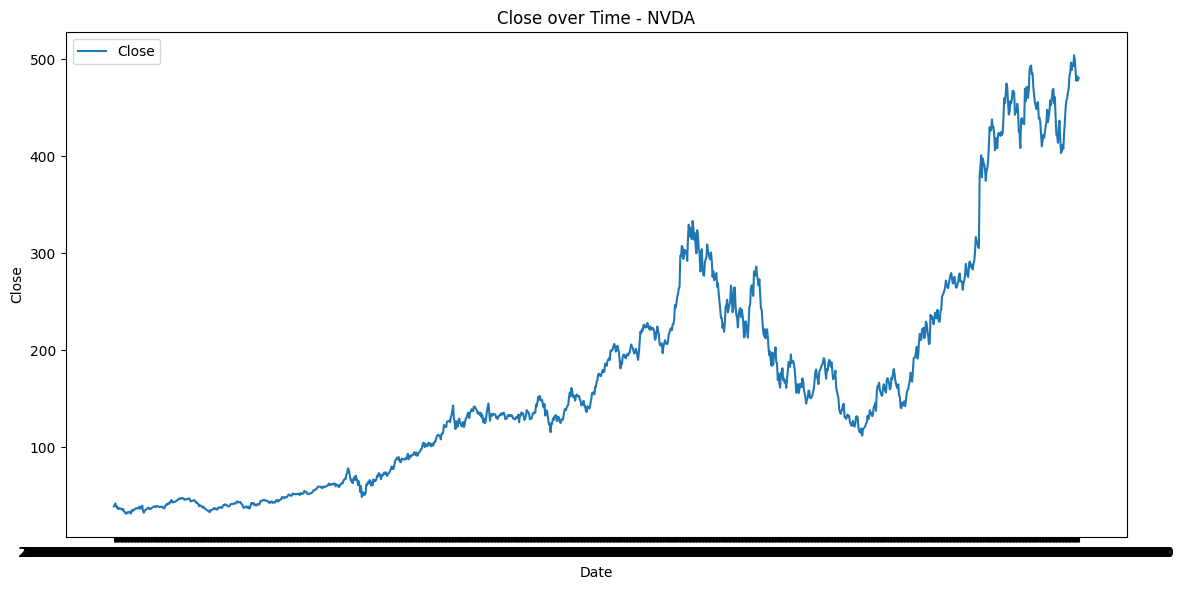

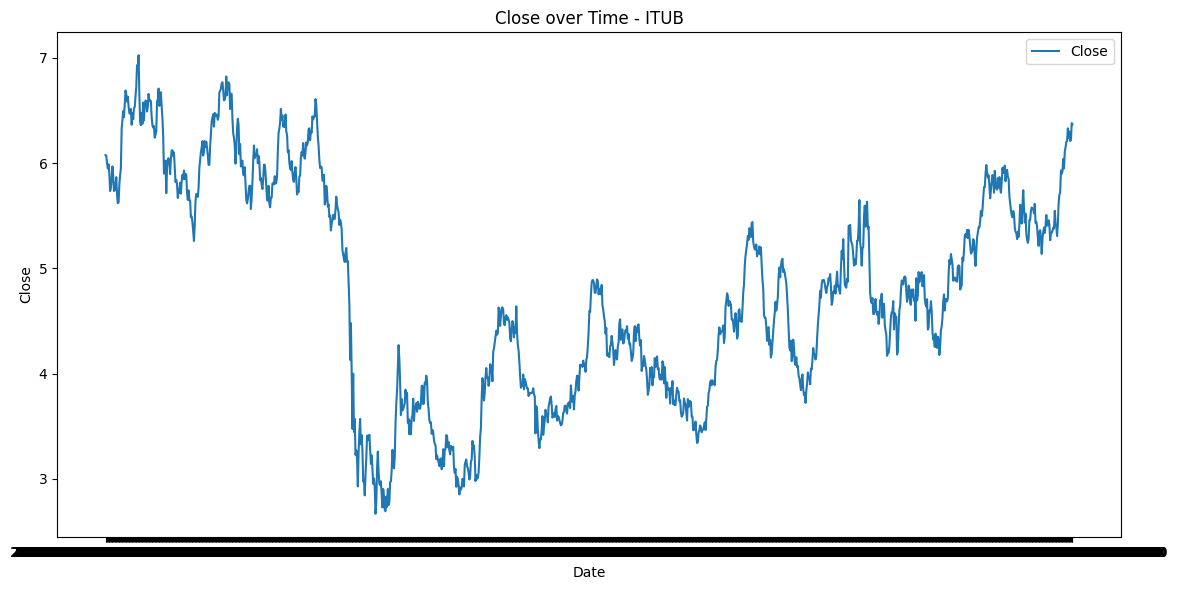

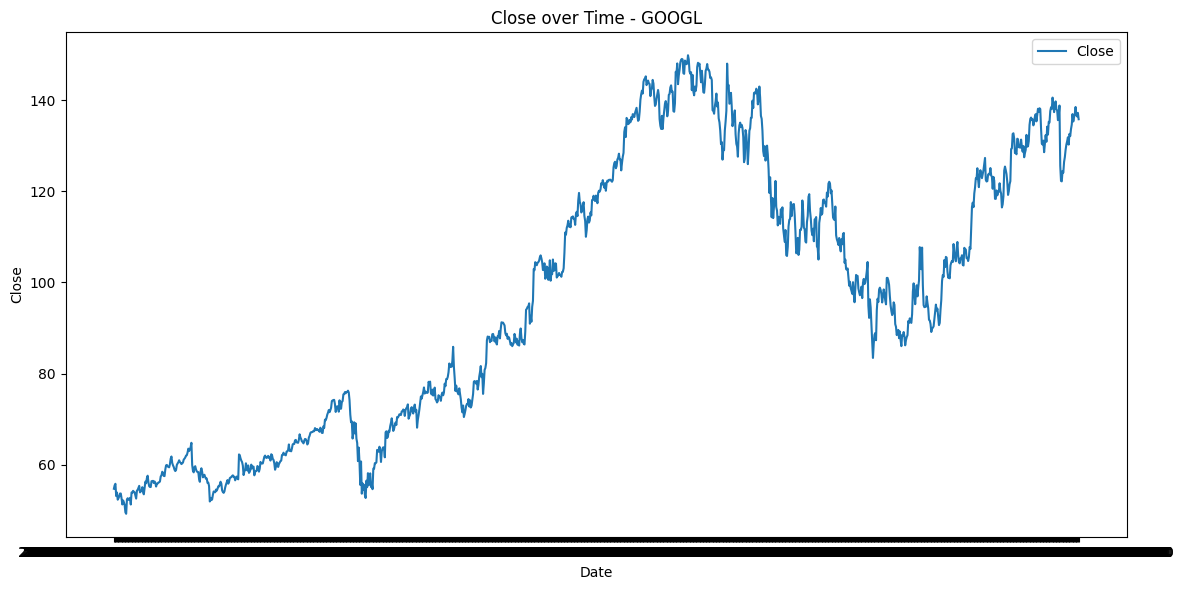

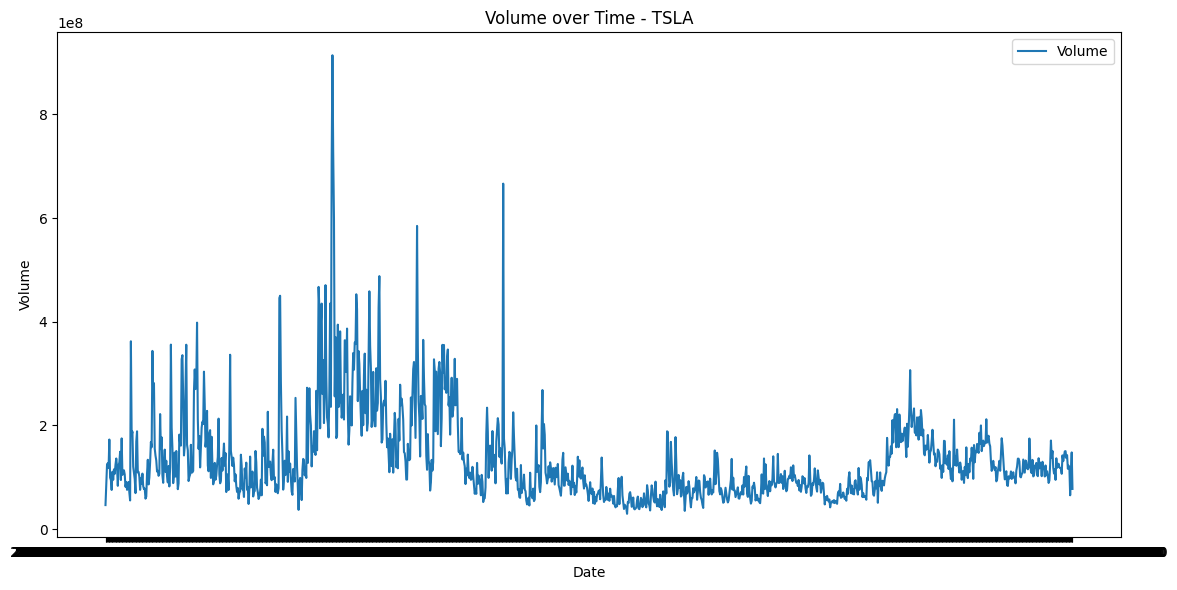

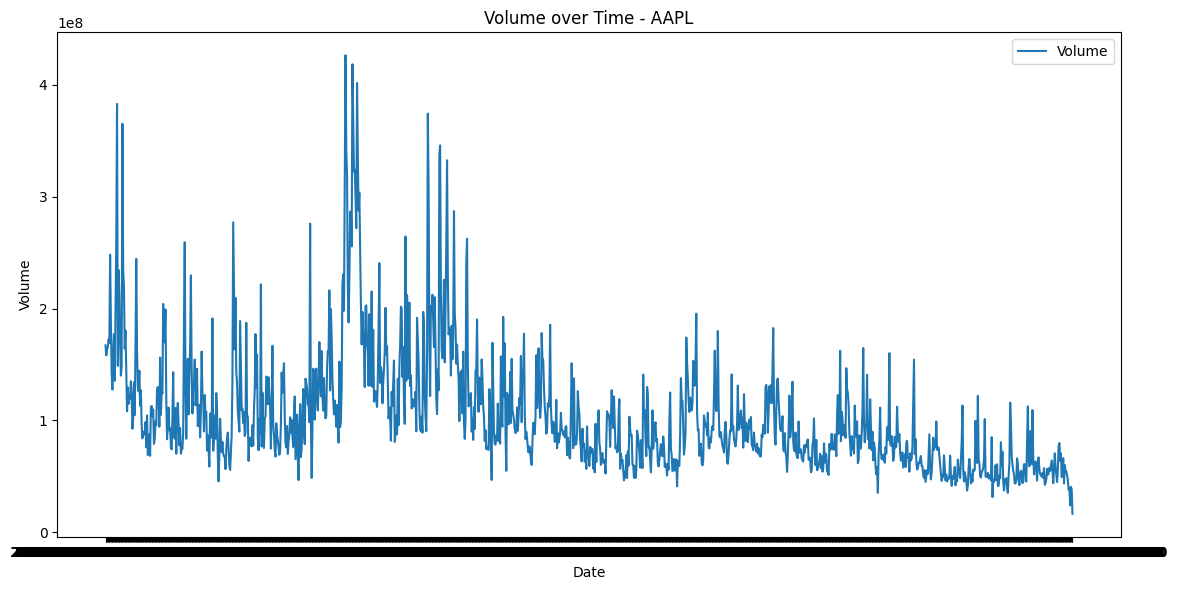

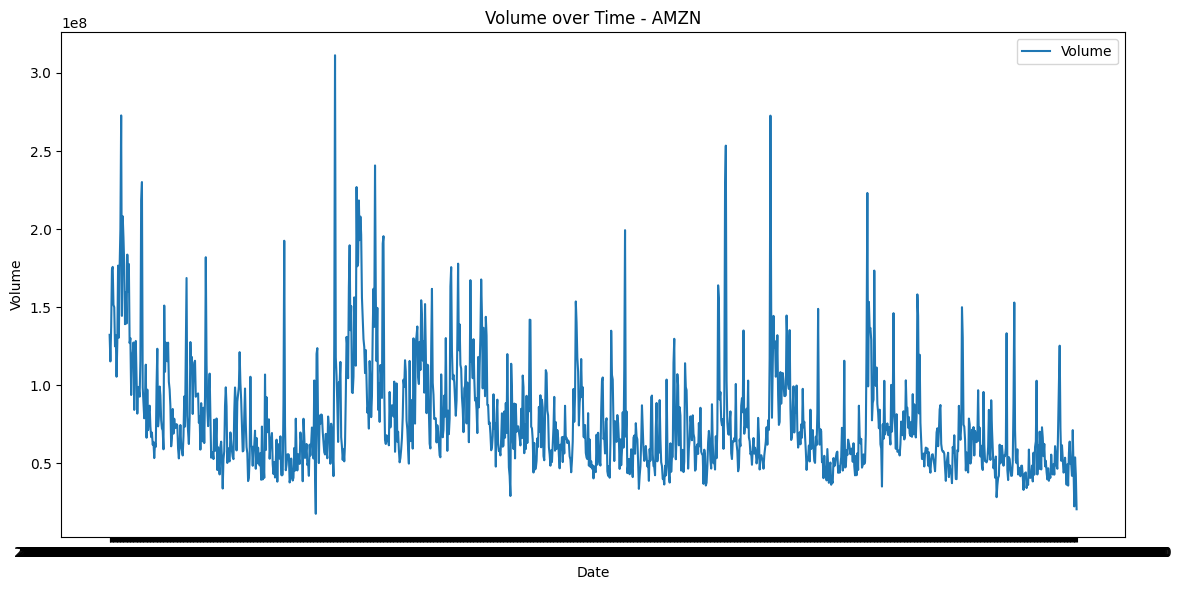

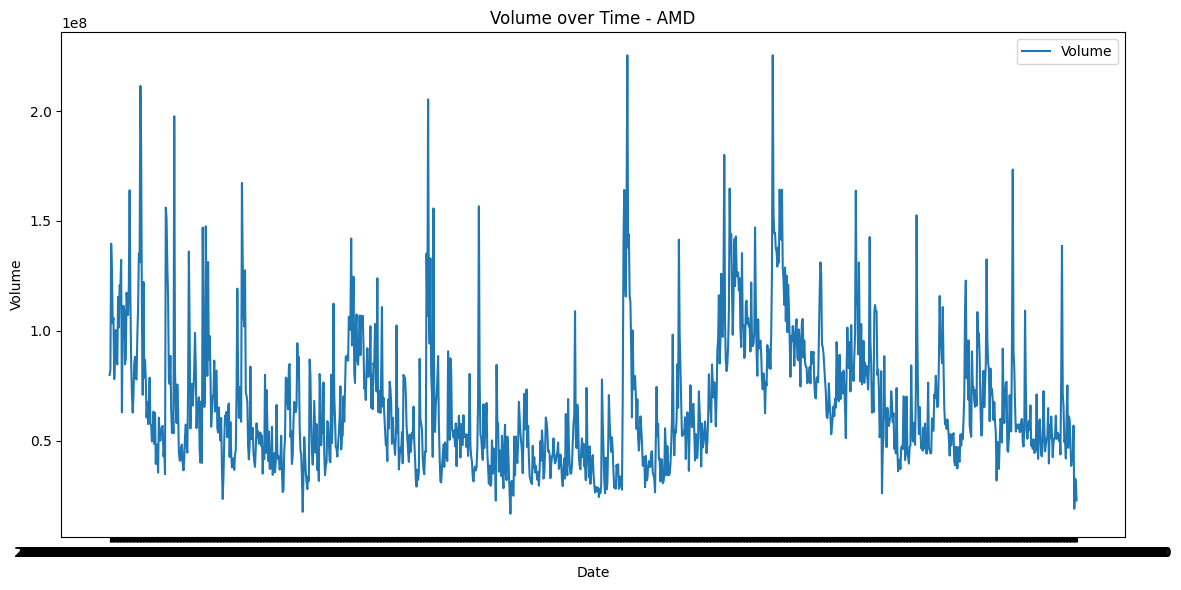

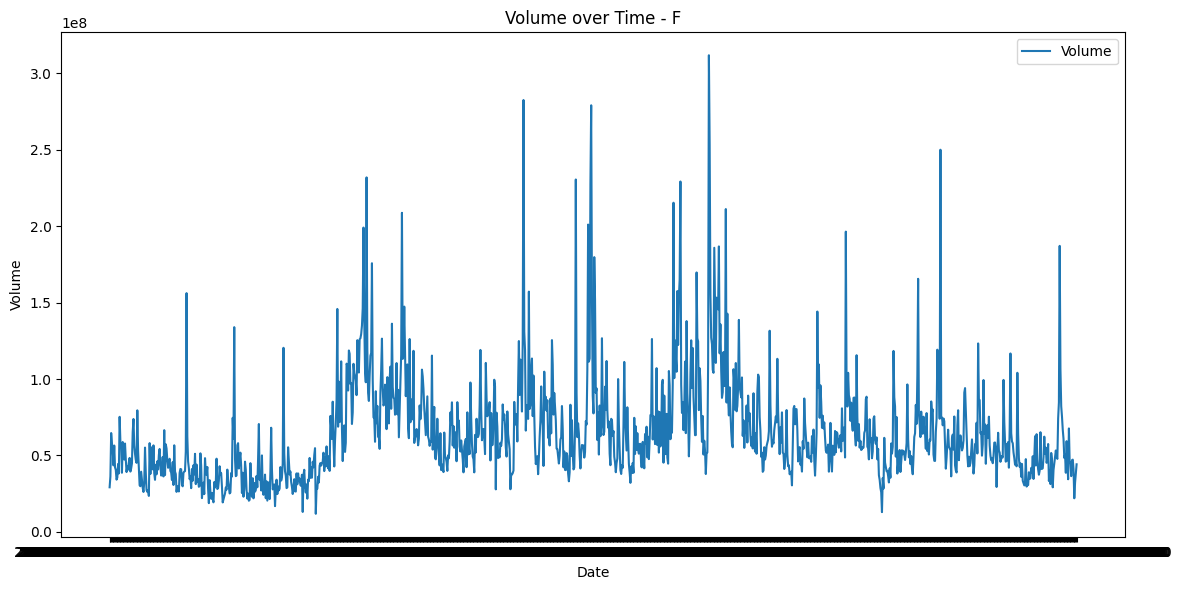

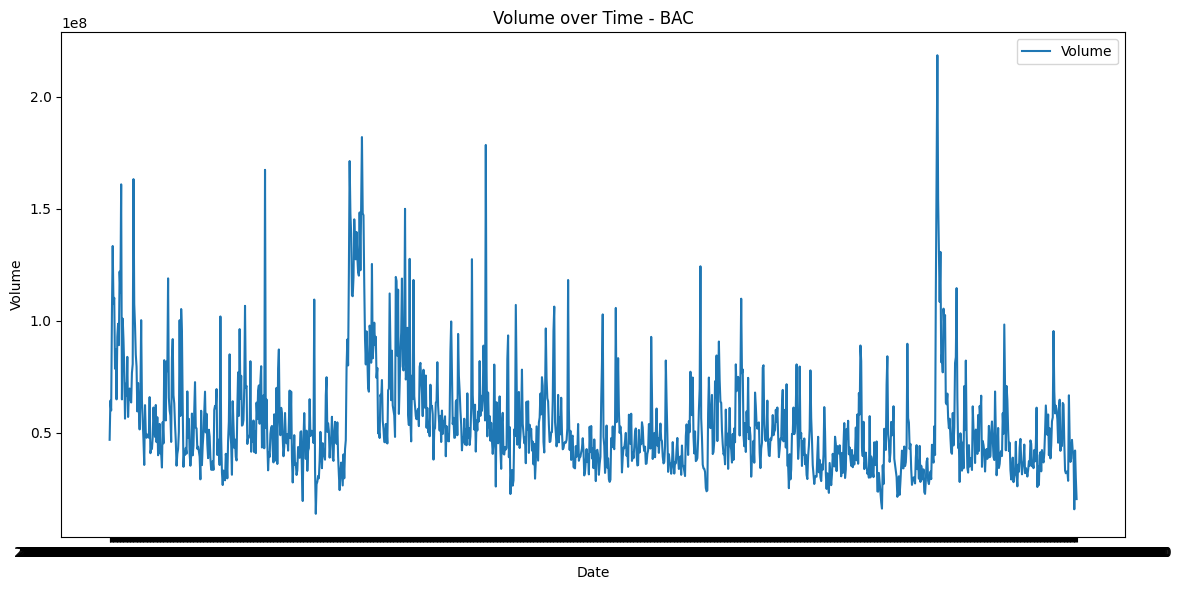

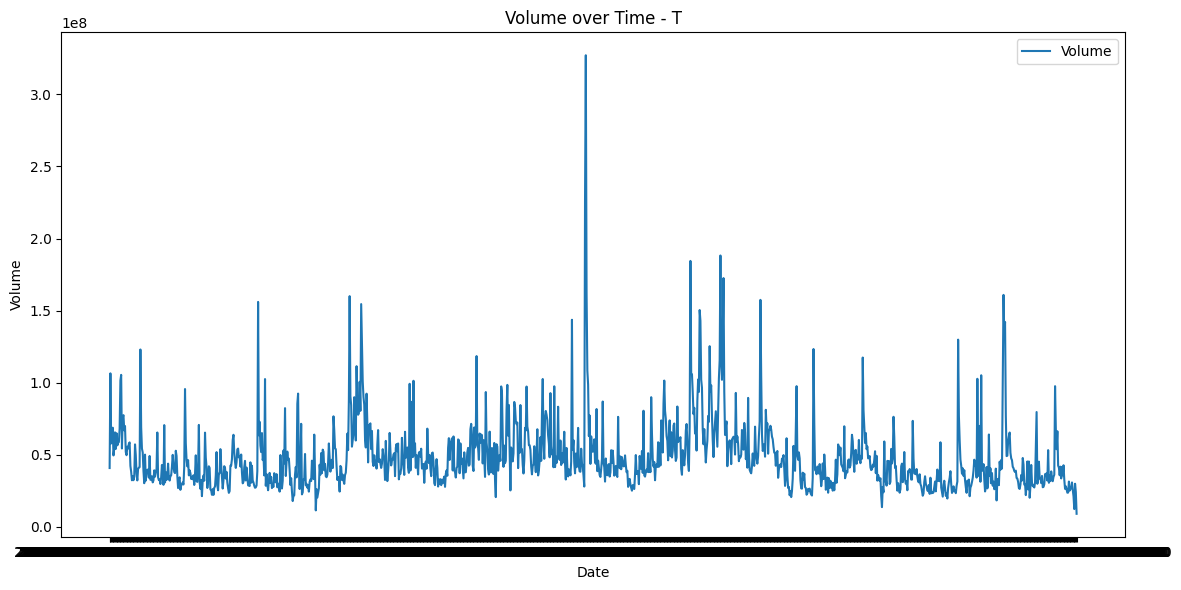

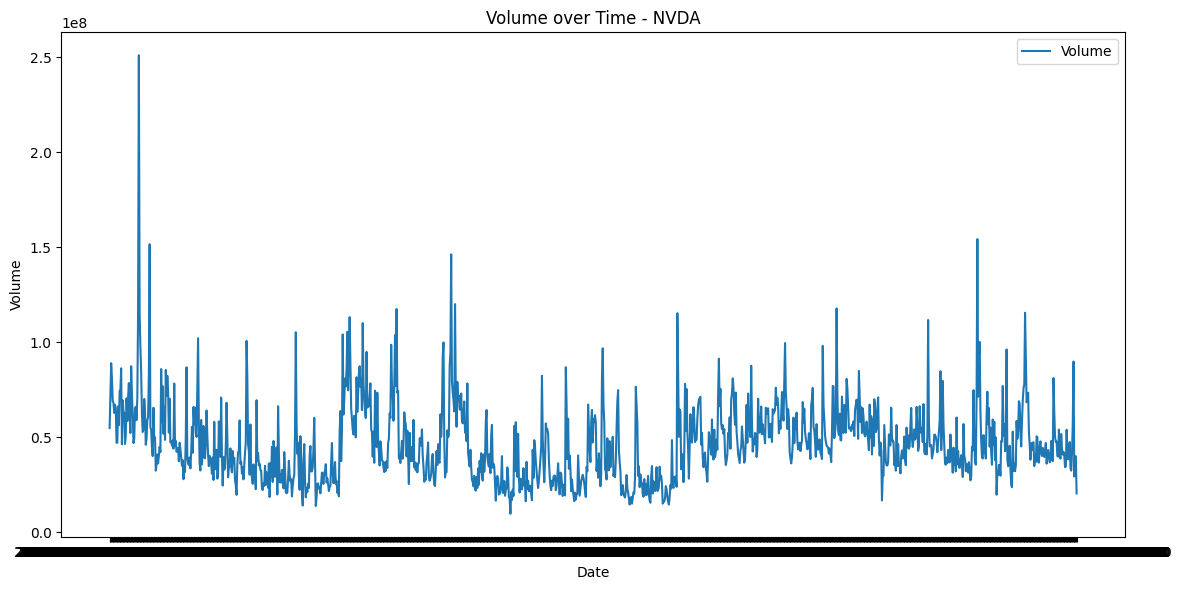

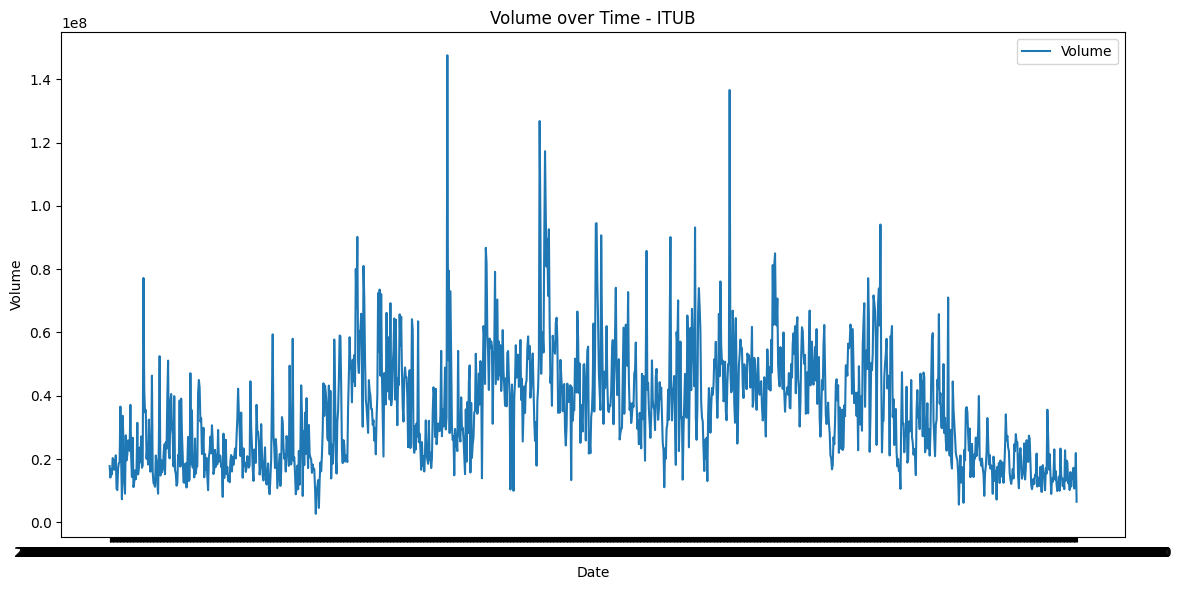

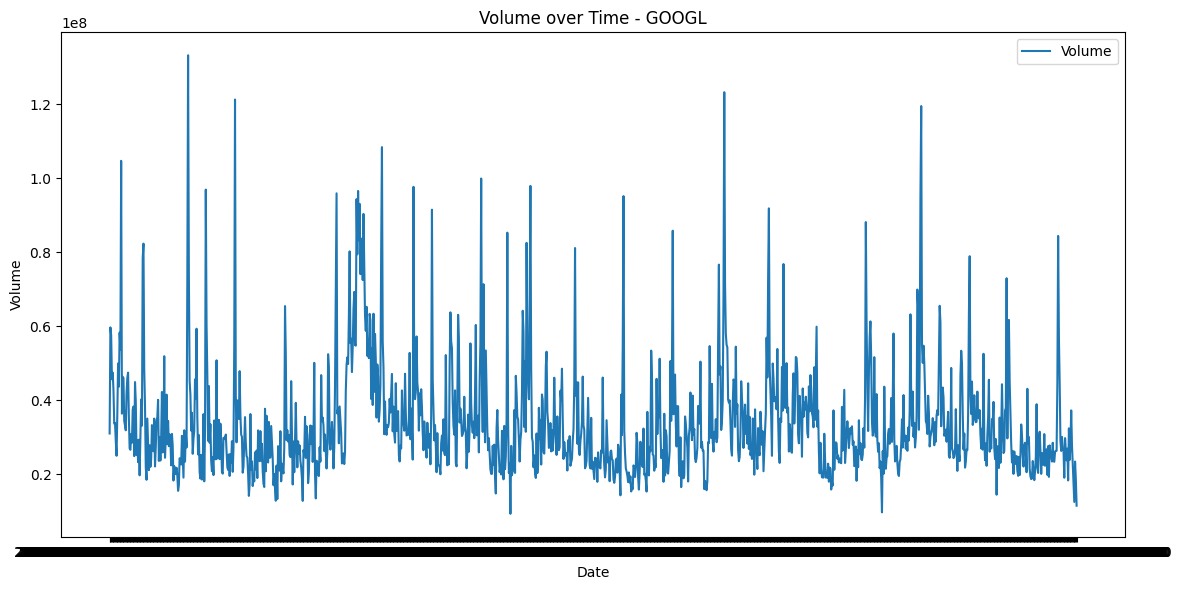

In [7]:
def plot_company_data(df, feature='Close', top_n=10):
    """
    Plots time series data for the given feature for top N companies by total volume.
    """
    # Calculate top N companies by total traded volume
    top_companies = (
        df.groupby('Company')['Volume']
        .sum()
        .sort_values(ascending=False)
        .head(top_n)
        .index
    )

    for company in top_companies:
        company_df = df[df['Company'] == company]

        plt.figure(figsize=(12, 6))
        plt.plot(company_df['Date'], company_df[feature], label=feature)
        plt.title(f"{feature} over Time - {company}")
        plt.xlabel("Date")
        plt.ylabel(feature)
        plt.legend()
        plt.tight_layout()
        plt.show()


plot_company_data(df, feature='Close', top_n=10)
plot_company_data(df, feature='Volume', top_n=10)

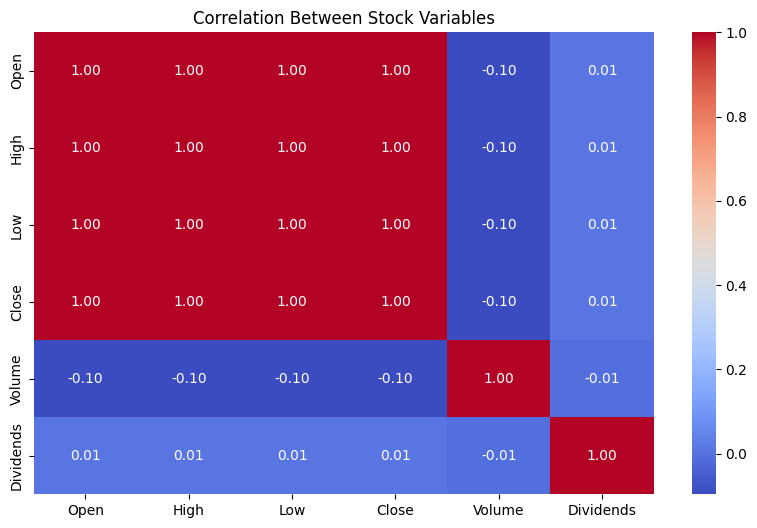

In [8]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends']

correlation = df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Stock Variables")
plt.show()


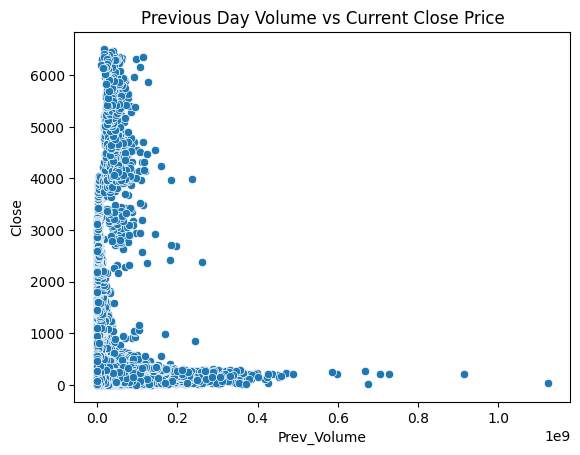

In [9]:
df = df.sort_values('Date')
df['Prev_Volume'] = df['Volume'].shift(1)

sns.scatterplot(data=df, x='Prev_Volume', y='Close')
plt.title("Previous Day Volume vs Current Close Price")
plt.show()

# Run a regression analysis

In [10]:
import statsmodels.api as sm


company = df['Company'].unique()[0]
company_df = df[df['Company'] == company].sort_values('Date')


X = company_df[['Volume']]
y = company_df['Close']


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


print(f"OLS Regression for {company}: Volume → Close")
print(model.summary())


OLS Regression for AAPL: Volume → Close
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     371.1
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.16e-72
Time:                        01:02:54   Log-Likelihood:                -6465.3
No. Observations:                1258   AIC:                         1.293e+04
Df Residuals:                    1256   BIC:                         1.294e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [11]:
import plotly.express as px

fig = px.scatter(
    company_df,
    x='Volume',
    y='Close',
    trendline='ols',
    opacity=0.6,
    title=f"{company}: Volume vs Close with Regression Line"
)
fig.show()


In [12]:
# Multivariate regression
X_multi = company_df[['Open', 'High', 'Low']]
y_multi = company_df['Close']

X_multi = sm.add_constant(X_multi)
multi_model = sm.OLS(y_multi, X_multi).fit()

print(f"Multiple Regression for {company}: [Open, High, Low] → Close")
print(multi_model.summary())


Multiple Regression for AAPL: [Open, High, Low] → Close
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.280e+06
Date:                Tue, 01 Jul 2025   Prob (F-statistic):               0.00
Time:                        01:02:58   Log-Likelihood:                -1578.8
No. Observations:                1258   AIC:                             3166.
Df Residuals:                    1254   BIC:                             3186.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------